In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from watermark import watermark
print(watermark())
print(watermark(packages="pandas,numpy,matplotlib,mpl_toolkits"))

Last updated: 2025-06-13T14:28:55.788683-07:00

Python implementation: CPython
Python version       : 3.13.3
IPython version      : 9.3.0

Compiler    : MSC v.1943 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores   : 72
Architecture: 64bit

pandas      : 2.2.3
numpy       : 2.1.2
matplotlib  : 3.10.3
mpl_toolkits: unknown



## Prepare data

In [2]:
dots = pd.read_csv("dots_q17n12md5w5cb_rep218_nbarcodes10_prand0.02_pdrop0.05.csv")

In [3]:
cand_bcs = pd.read_csv("candidate_barcodes_q17n12md5w5cb_rep_218_nbarcodes10_prand0.02_pdrop0.05.csv")

In [4]:
decoded = pd.read_csv("decoded_q17n12md5w5cb_rep_218_nbarcodes10_prand0.02_pdrop0.05_lf10.0_drc0.csv")

In [5]:
cand_bcs.cpath = [eval(cp) for cp in cand_bcs.cpath]

In [6]:
cpath_lens = [len(cp) for cp in cand_bcs.cpath]

In [7]:
cand_bcs = cand_bcs.loc[np.equal(cpath_lens, 5)]

In [8]:
dots.sort_values(["block", "pseudocolor", "x", "y"], inplace=True)

In [9]:
dots.reset_index(inplace=True)

In [10]:
decoded.cpath = [eval(cp) for cp in decoded.cpath]

## Plot Figure

In [11]:
def plot_single_rotation(fig, dots, bcs, dcd, azim, elev):
    ax = fig.add_subplot(1, 1, 1, projection='3d', azim=azim, elev=elev, proj_type='ortho')
    ax.scatter(dots.x, dots.y, dots['block'], s = 100) #, color=dots.pseudocolor)
    ax.set_xlim(np.min(dots.x),np.max(dots.x))
    ax.set_ylim(np.min(dots.y),np.max(dots.y))
    #ax.set_aspect("equalxy")
    ax.set_box_aspect((12,12,20))
    ax.set_xticks([0,0.5, 1.0])
    ax.set_yticks([0,0.5, 1.0])
    ax.set_zticks([1,2,3,4,5,6,7,8,9,10,11,12])
    

    X = np.linspace(np.min(dots.x),np.max(dots.x),4)
    Y =  np.linspace(np.min(dots.y),np.max(dots.y),4)
    X, Y = np.meshgrid(X, Y)

    for zlevel in range(1,13):
        Z = np.zeros(np.shape(X)) + zlevel
        ax.plot_surface(X, Y, Z, color='royalblue', edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.1)

    for cp in bcs.cpath:
        cpa = np.array(cp) -1
        #print(cpa)
        #print(dots.loc[cpa,:])
        ax.plot(dots.loc[cpa,"x"], dots.loc[cpa, "y"], dots.loc[cpa, "block"], color="gray", linewidth =0.5)

    for cp in dcd.cpath:
        cpa = np.array(cp) -1
        #print(cpa)
        #print(dots.loc[cpa,:])
        ax.plot(dots.loc[cpa,"x"], dots.loc[cpa, "y"], dots.loc[cpa, "block"], color="black", linewidth = 0.8)
        ax.plot(dots.loc[cpa,"x"], dots.loc[cpa, "y"], dots.loc[cpa, "block"], linewidth = 2)

    ax.set_zlabel("Barcoding Block")
    ax.set_xlabel("X (pixels)")
    ax.set_ylabel("Y (pixels)")

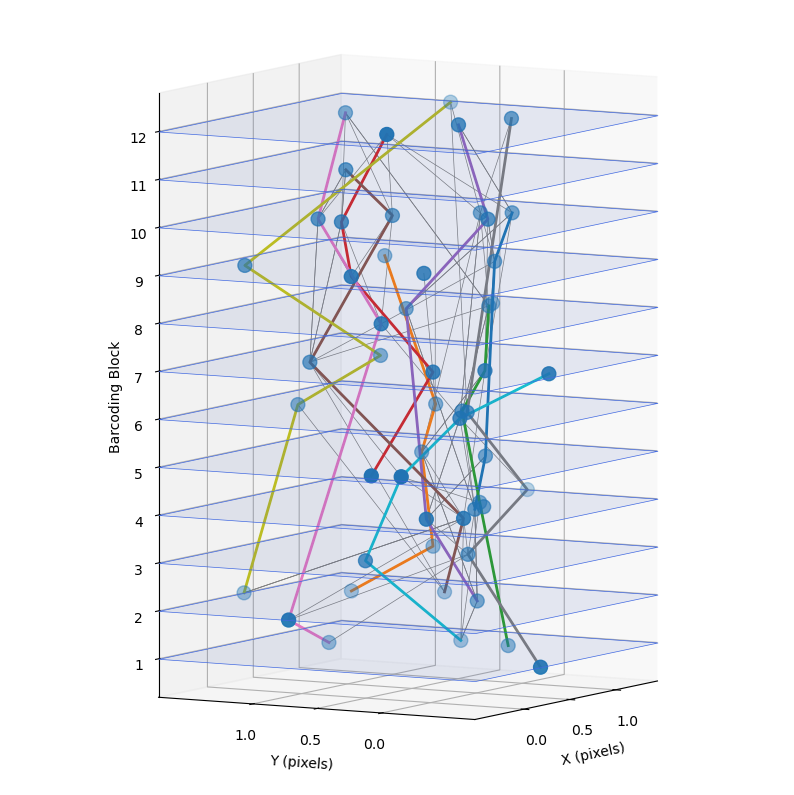

In [12]:
fig = plt.figure(figsize=(10,101))
plot_single_rotation(fig, dots, cand_bcs, decoded, 210, 7)

plt.savefig("fig1E.pdf")

## Make steroscopic versions of the fibure from a couple of angles

In [13]:
def plot_rotation(fig, dots, bcs, dcd, azim, elev, plot_pos):
    ax = fig.add_subplot(1, 2, plot_pos, projection='3d', azim=azim, elev=elev, proj_type='ortho')
    ax.scatter(dots.x, dots.y, dots['block'], s = 100) #, color=dots.pseudocolor)
    ax.set_xlim(np.min(dots.x),np.max(dots.x))
    ax.set_ylim(np.min(dots.y),np.max(dots.y))
    #ax.set_aspect("equalxy")
    ax.set_box_aspect((12,12,20))
    ax.set_xticks([0,0.5, 1.0])
    ax.set_yticks([0,0.5, 1.0])
    ax.set_zticks([1,2,3,4,5,6,7,8,9,10,11,12])
    

    X = np.linspace(np.min(dots.x),np.max(dots.x),4)
    Y =  np.linspace(np.min(dots.y),np.max(dots.y),4)
    X, Y = np.meshgrid(X, Y)

    for zlevel in range(1,13):
        Z = np.zeros(np.shape(X)) + zlevel
        ax.plot_surface(X, Y, Z, color='royalblue', edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.1)

    for cp in bcs.cpath:
        cpa = np.array(cp) -1
        #print(cpa)
        #print(dots.loc[cpa,:])
        ax.plot(dots.loc[cpa,"x"], dots.loc[cpa, "y"], dots.loc[cpa, "block"], color="gray", linewidth =0.5)

    for cp in dcd.cpath:
        cpa = np.array(cp) -1
        ax.plot(dots.loc[cpa,"x"], dots.loc[cpa, "y"], dots.loc[cpa, "block"], color="black", linewidth = 0.8)
        ax.plot(dots.loc[cpa,"x"], dots.loc[cpa, "y"], dots.loc[cpa, "block"], linewidth = 2)

    ax.set_zlabel("Barcoding Block")
    ax.set_xlabel("X pixels")
    ax.set_ylabel("Y pixels")


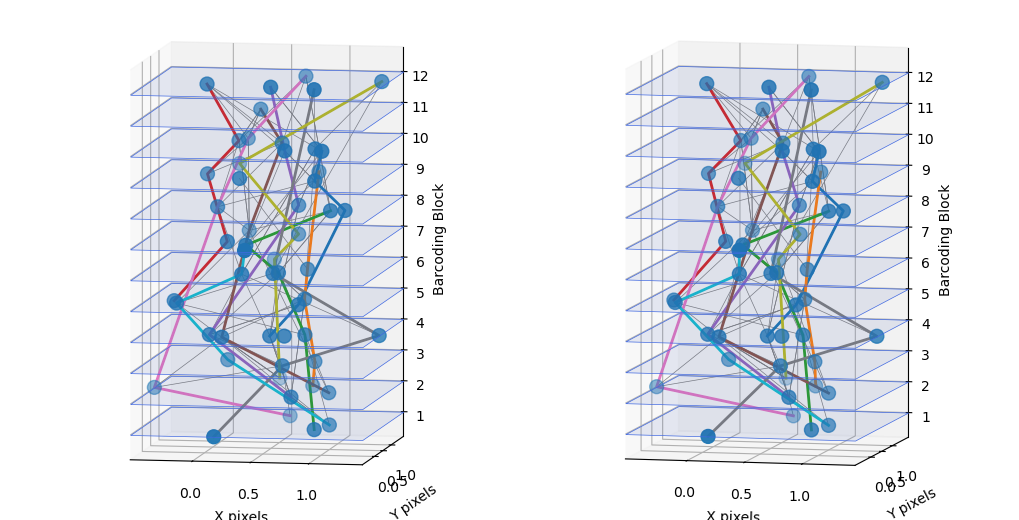

In [14]:
fig = plt.figure(figsize=(10,101))
plot_rotation(fig, dots, cand_bcs, decoded, -80, 7, 1)
plot_rotation(fig, dots, cand_bcs, decoded, -77, 7, 2)

fig.tight_layout(pad=0)

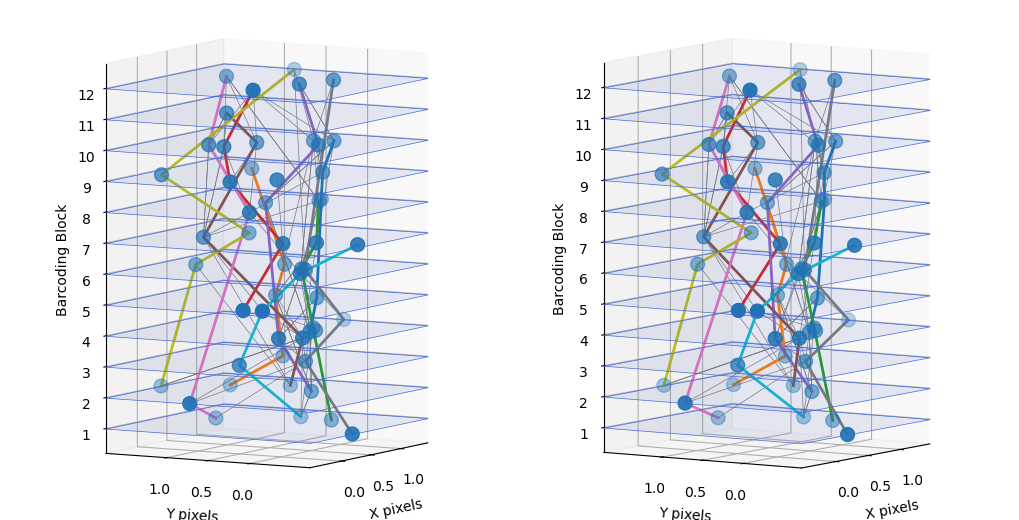

In [15]:
fig = plt.figure(figsize=(10,101))
plot_rotation(fig, dots, cand_bcs, decoded, 210, 7, 1)
plot_rotation(fig, dots, cand_bcs, decoded, 213, 7, 2)

fig.tight_layout(pad=0)